# CellML Models for Cardiac Cellular Electrophysiological Modelling

We here present the CellML models referenced in the book chapter: Cardiac Cellular Electrophysiological Modelling. This notebook requires the OpenCOR Phython environment to run, as described here: https://opencor.github.io/userInterfaces/commandLineInterfacePythonRelatedScripts.html

In [1]:
import opencor as opencor
import matplotlib.pyplot as plt

## Figure 4

First we load the SED-ML files which define the single stimulus simulation experiments that we want to run with the original FHN model and each of the Rogers & McCulloch and Aliev & Panfilov modified versions of the FHN model.

In [2]:
fhn = opencor.open_simulation('models/1961_fitzhugh/experiments/single-stimulus.sedml')
rogers = opencor.open_simulation('models/1994_rogers/experiments/single-stimulus.sedml')
aliev = opencor.open_simulation('models/1996_aliev/experiments/single-stimulus.sedml')

We can now run each of the simulations and grabthe results that we wish to plot.

In [3]:
# reset and clear any existing results
fhn.reset(True)
fhn.clear_results()
rogers.reset(True)
rogers.clear_results()
aliev.reset(True)
aliev.clear_results()

# decalare our results dictionaries
fhn_data = {}
rogers_data = {}
aliev_data = {}

fhn.run()
ds = fhn.results().data_store()
# membrane potential
fhn_data['Vm'] = ds.voi_and_variables()['output_variables/Vm'].values()
# activation variable
fhn_data['v'] = ds.voi_and_variables()['output_variables/v'].values()
# Total current
fhn_data['Iion'] = ds.voi_and_variables()['output_variables/Iion'].values()

rogers.run()
ds = rogers.results().data_store()
# membrane potential
rogers_data['Vm'] = ds.voi_and_variables()['output_variables/Vm'].values()
# activation variable
rogers_data['v'] = ds.voi_and_variables()['output_variables/v'].values()
# Total current
rogers_data['Iion'] = ds.voi_and_variables()['output_variables/Iion'].values()

aliev.run()
ds = aliev.results().data_store()
# membrane potential
aliev_data['Vm'] = ds.voi_and_variables()['output_variables/Vm'].values()
# activation variable
aliev_data['v'] = ds.voi_and_variables()['output_variables/v'].values()
# Total current
aliev_data['Iion'] = ds.voi_and_variables()['output_variables/Iion'].values()


Now that we have the data, we can generate the desired plots

<IPython.core.display.Javascript object>


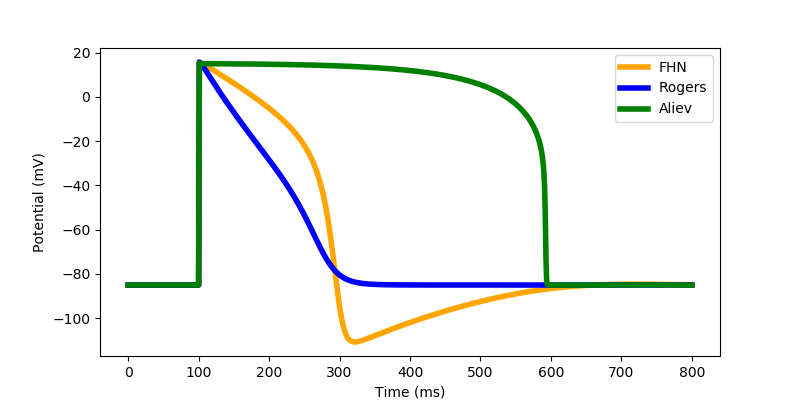

<IPython.core.display.Javascript object>


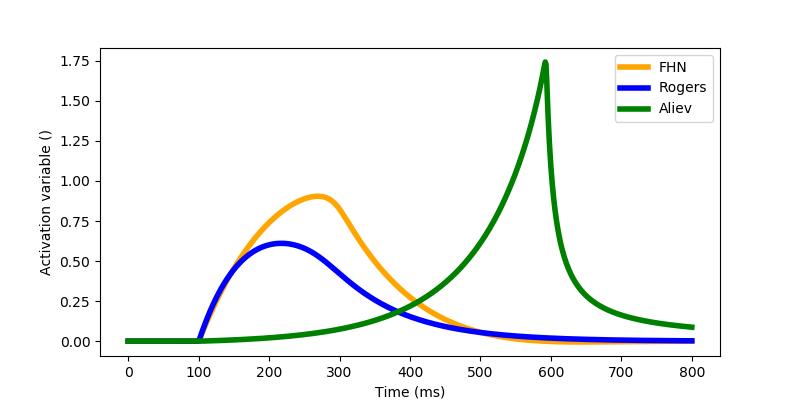

<IPython.core.display.Javascript object>


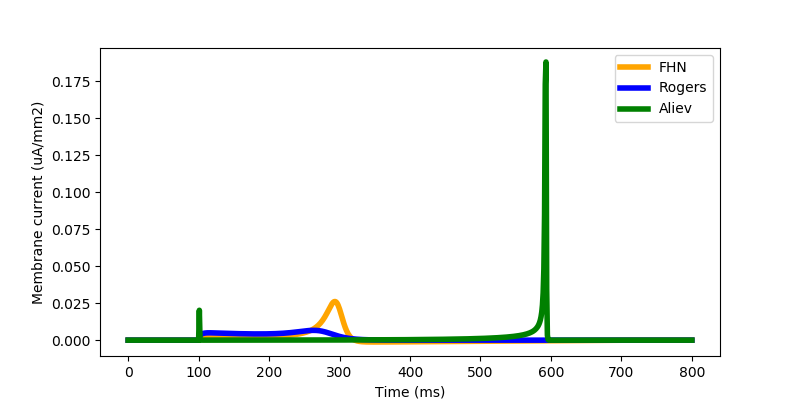

In [4]:
time = range(0,801)
plt.figure(figsize=(8,4))
plt.plot(time, fhn_data['Vm'], label='FHN', color='red', linewidth=4)
plt.plot(time, rogers_data['Vm'], label='Rogers', color='blue', linewidth=4)
plt.plot(time, aliev_data['Vm'], label='Aliev', color='green', linewidth=4)
plt.legend()
plt.ylabel('Potential (mV)')
plt.xlabel('Time (ms)')
plt.figure(figsize=(8,4))
plt.plot(time, fhn_data['v'], label='FHN', color='red', linewidth=4)
plt.plot(time, rogers_data['v'], label='Rogers', color='blue', linewidth=4)
plt.plot(time, aliev_data['v'], label='Aliev', color='green', linewidth=4)
plt.legend()
plt.ylabel('Activation variable ()')
plt.xlabel('Time (ms)')
plt.figure(figsize=(8,4))
plt.plot(time, fhn_data['Iion'], label='FHN', color='red', linewidth=4)
plt.plot(time, rogers_data['Iion'], label='Rogers', color='blue', linewidth=4)
plt.plot(time, aliev_data['Iion'], label='Aliev', color='green', linewidth=4)
plt.legend()
plt.ylabel('Membrane current (uA/mm2)')
plt.xlabel('Time (ms)')
plt.show()

and now we can close those simulations as we are finished with them.

In [5]:
opencor.close_simulation(fhn)
opencor.close_simulation(rogers)
opencor.close_simulation(aliev)

# Figure 5

In [10]:
def run_simulation(sedml, variable):
    s = opencor.open_simulation(sedml)
    # reset and clear any existing results
    s.reset(True)
    s.clear_results()
    # run the simulation
    s.run()
    ds = s.results().data_store()
    variable_values = ds.voi_and_variables()[variable].values()
    opencor.close_simulation(s)
    return variable_values


<IPython.core.display.Javascript object>


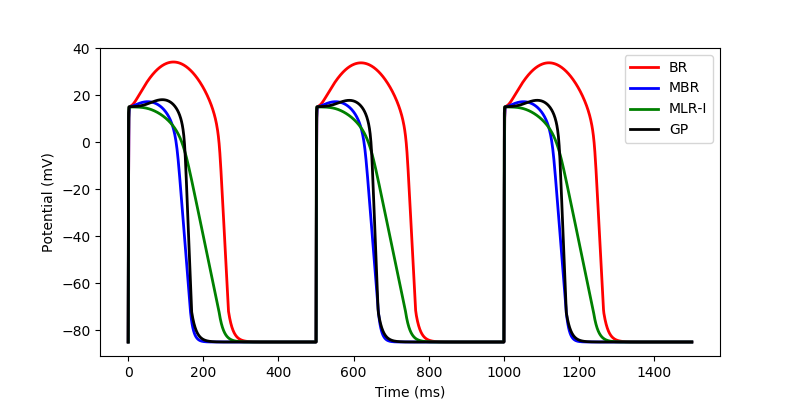

In [14]:
br = run_simulation('models/1998_fenton/experiments/BR.sedml', 'output_variables/Vm')
mbr = run_simulation('models/1998_fenton/experiments/MBR.sedml', 'output_variables/Vm')
mLRi = run_simulation('models/1998_fenton/experiments/MLR-I.sedml', 'output_variables/Vm')
gp = run_simulation('models/1998_fenton/experiments/GP.sedml', 'output_variables/Vm')

time = range(0,1501)
plt.figure(figsize=(8,4))
plt.plot(time, br, label='BR', color='red', linewidth=2)
plt.plot(time, mbr, label='MBR', color='blue', linewidth=2)
plt.plot(time, mLRi, label='MLR-I', color='green', linewidth=2)
plt.plot(time, gp, label='GP', color='black', linewidth=2)
plt.legend()
plt.ylabel('Potential (mV)')
plt.xlabel('Time (ms)')
plt.show()